In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
np.random.seed(555)
import pystan

In [50]:
# from urllib.request import urlretrieve
# urlretrieve('https://git.io/vXknD', '../data/challenger_data.csv')

In [51]:
import pandas as pd

data = pd.read_csv('../data/challenger_data.csv')
data = data.rename(columns={'Damage Incident': 'DamageIncident'})
filtered_data = data.dropna().query('DamageIncident=="0" or DamageIncident=="1"')

In [52]:
filtered_data

,Date,Temperature,DamageIncident
0,04/12/1981,66,0
1,11/12/1981,70,1
2,3/22/82,69,0
4,01/11/1982,68,0
5,04/04/1983,67,0
6,6/18/83,72,0
7,8/30/83,73,0
8,11/28/83,70,0
9,02/03/1984,57,1
10,04/06/1984,63,1


In [53]:
stan_code = """

data {
    int N;
    int temperture[N];
    int Y[N];
}

parameters {
    real alpha;
    real beta;
}

transformed parameters {
    real p[N];
    for (n in 1:N)
        p[n] = 1.0/(1.0+exp(beta*temperture[n]+alpha));
}

model {
    alpha ~ normal(0, 10);
    beta ~ normal(0, 10);
    
    for (n in 1:N) {
        Y[n] ~ bernoulli(p[n]);
    }
}
"""

In [54]:
model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7d3488800987d79f23db7c923091ccd7 NOW.


In [55]:
stan_data = {
    'N': filtered_data.count()[0],
    'temperture': filtered_data.Temperature.astype('i'),
    'Y': filtered_data.DamageIncident.astype('i')
}

In [56]:
op = model.optimizing(data=stan_data)
init_params = {'alpha': op.get('alpha'), 'beta': op.get('beta')}
init_list = [init_params]*4
fit = model.sampling(data=stan_data, init=init_list, iter=3000, chains=4, seed=555, thin=1, warmup=300, n_jobs=-1)
fit = model.sampling(data=stan_data, iter=1000, chains=4, seed=555, thin=1, warmup=100, n_jobs=-1)
fit

Inference for Stan model: anon_model_7d3488800987d79f23db7c923091ccd7.
4 chains, each with iter=1000; warmup=100; thin=1; 
post-warmup draws per chain=900, total post-warmup draws=3600.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha -11.83    0.25   5.11 -23.01 -15.19 -11.39  -8.12  -2.86    405   1.01
beta    0.19  3.7e-3   0.08   0.05   0.13   0.18   0.24   0.35    409   1.01
p[0]     0.4  2.6e-3   0.12   0.18   0.31   0.39   0.48   0.65   2216    1.0
p[1]    0.25  2.0e-3    0.1   0.08   0.18   0.24   0.31   0.46   2365    1.0
p[2]    0.28  1.8e-3    0.1    0.1   0.21   0.27   0.35    0.5   3468    1.0
p[3]    0.32  1.9e-3   0.11   0.13   0.24   0.31   0.39   0.55   3469    1.0
p[4]    0.36  2.2e-3   0.12   0.15   0.27   0.35   0.43    0.6   2891    1.0
p[5]    0.19  2.3e-3   0.09   0.05   0.12   0.18   0.25   0.39   1455    1.0
p[6]    0.17  2.5e-3   0.09   0.04    0.1   0.16   0.22   0.37   1201    1.0
p[7]    0.25  2.0e-3    0.1   0.08   0.18  

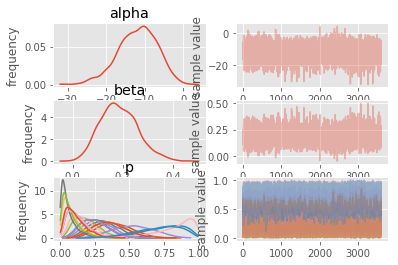

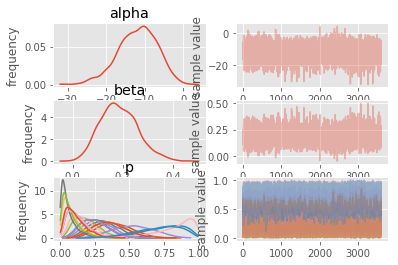

In [63]:
fit.traceplot()

In [62]:
alpha = -11.83
beta = 0.19

prob = lambda a,b,t: 1.0/(1.0+np.exp(b*t+a))

(np.random.binomial(100, prob(alpha, beta, 60),zxdcfrtf nhp 25000)/100).mean()

0.6063444